psi value {0} 0.36221814521165807
0.10041875741250866


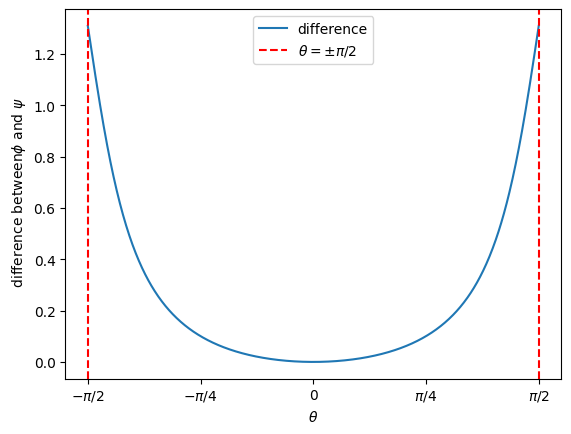

0.10041875741250866
1.109881895318893


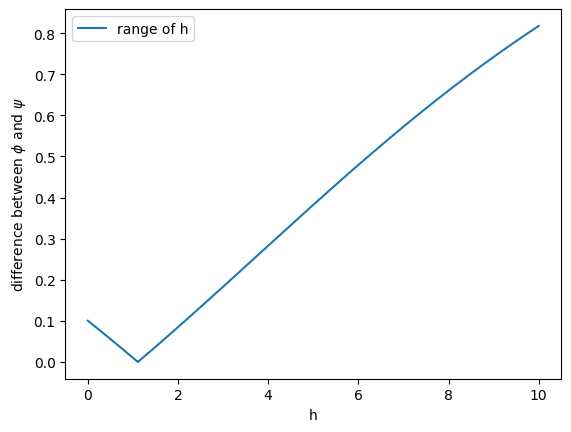

<Figure size 640x480 with 0 Axes>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# function that calculates the angle psi given in the report
def calculating_psi(theta,h,s,phi):
  #print(np.cos(theta))
  tan_psi = (1/np.cos(theta))*np.tan(phi) - (h/s)*np.tan(theta)
  psi = np.arctan(tan_psi)
  return psi

#an inverse function so to speak of the one above to determine when h was 0
def calcualting_h(psi,phi,theta,s):
   h = (s*((1/np.cos(theta))*np.tan(phi) - np.tan(psi)))/(np.tan(theta))
   return h

# so s is going to be a constant so we are seeing how theta and h affect the difference in
#phi(true angle) and psi(projected angle)

s = 10 # the distance from between the X-ray source S and the plane parallel to the screen which contains one end of the object O
h_cosntant = 0 # the vertical distance from the source and the parallel line
phi = np.pi/12 # phi is 15 degrees
theta = np.linspace(-np.pi/2,np.pi/2,1000) # the angle in which the 'stick' is tilted away from the screen

psi = calculating_psi(theta,h_cosntant,s,phi);
psi_z = calculating_psi(np.pi/4,h_cosntant,s,phi);
diff1 = psi_z - phi
print("psi value {0}",psi_z)
print(diff1)
difference_theta = (psi - phi);


# You can specify a rotation for the tick
# labels in degrees or with keywords.
ticks = [-np.pi/2,-np.pi/4, 0 ,np.pi/4, np.pi/2]
tick_labels = [r"$-\pi/2$",r"$-\pi/4$",0,r"$\pi/4$",r"$\pi/2$"]
fig, ax = plt.subplots()

ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)
#plotting theta agaisnt the differecne in the angles
plt.plot(theta,difference_theta,label = "difference")
plt.axvline(x=(-np.pi/2), color='r',linestyle='--', label=r"$\theta = \pm\pi/2$")
plt.axvline(x=(np.pi/2), color='r',linestyle='--')
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\text{ difference between} \phi \text{ and } \psi$")
plt.legend()
plt.show()
plt.savefig("difference_withh.png")
plt.close()

#now lets see how h affects when we have a constant angle theta
theta_constant = np.pi/4
h = np.linspace(0,10,1000)
#phi is pi/18
psi = calculating_psi(theta_constant,h,s,phi);
psi_test = calculating_psi(theta_constant,10,s,phi);
#print(psi_test)
#print(psi_test-phi)
#projected image - true image
difference = np.abs(psi - phi);
print(difference[0])
#print(difference)

plt.plot(h,difference,label = "range of h")
plt.xlabel("h")
plt.ylabel(r"$\text{difference between } \phi \text{ and } \psi$")
plt.legend()
plt.show()
plt.savefig("difference_for_h.png")




In [18]:
#code to import data into a graph
results = np.zeros((5,4))
#differnce_theta
#value of theta
#value of psi
#value of phi
#print(results)
## add the code here
psi_table  = calculating_psi(ticks,h_cosntant,s,phi);
print(psi_table)
table_difference = np.abs(psi_table - phi);
print(table_difference)
results[0,:] = [0,ticks[0],psi_table[0],table_difference[0]]
np.savetxt('table1.csv',results, delimiter=',')

[ 1.57079633  0.66176529  0.26179939 -0.0210595  -1.57079633]
[1.30899694 0.3999659  0.         0.28285889 1.83259571]
